In [8]:
import jax
import jax.numpy as jnp
import jax.random as jr
from jax.tree_util import Partial

import hugegp as hg

import matplotlib.pyplot as plt
import time

key = jr.key(137)

In [9]:
# Generate points
n_points = 100_000
key, k1 = jr.split(key)
points = jr.normal(k1, (n_points, 2))

# Compute neighbors
graph = hg.build_graph(points, k=4, start_level=10)

In [10]:
# Random excitations
key, k1 = jr.split(key)
xi = jr.normal(k1, (n_points,))

values = hg.generate_static(graph, xi, cuda=False).block_until_ready()
values_cuda = hg.generate_static(graph, xi, cuda=True).block_until_ready()

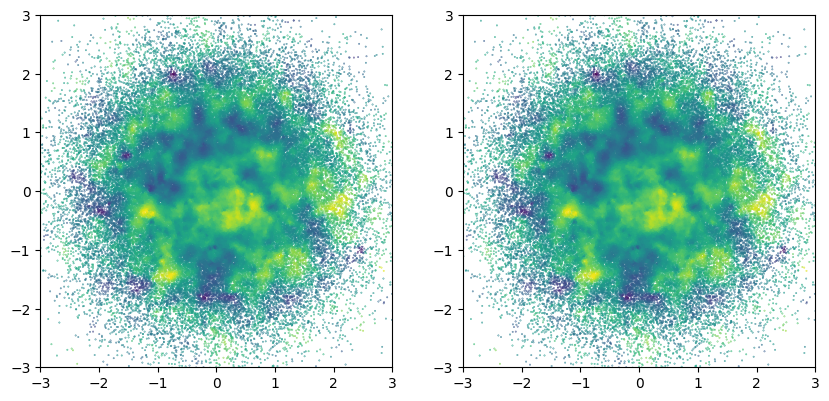

In [11]:
fig, axes = plt.subplots(ncols=2, figsize=(10, 5))
axes[0].scatter(*points.T, c=values, s=0.1, cmap='viridis')
axes[1].scatter(*points.T, c=values_cuda, s=0.1, cmap='viridis')
for ax in axes:
    ax.set(aspect='equal', xlim=(-3, 3), ylim=(-3, 3))
plt.show()

In [15]:
func = Partial(hg.generate_static, graph)

jax.jvp(func, (xi,), (jnp.ones_like(xi),))

(Array([ 1.1277543,  2.7498372, -1.1187031, ...,  0.3944788,  1.9961226,
        -1.2242277], dtype=float32),
 Array([2.424166 , 2.341612 , 2.9125903, ..., 3.9404082, 3.7151914,
        2.6852057], dtype=float32))